In [1]:
'''
Newest colab version at
https://colab.research.google.com/drive/1gIt_4EyrMbZcHUrZh5fxLoofFCDF3HGu?usp=sharing
'''

'\nNewest colab version at\nhttps://colab.research.google.com/drive/1gIt_4EyrMbZcHUrZh5fxLoofFCDF3HGu?usp=sharing\n'

In [2]:

# 3 frames
input=[["0 0.1 0.1 0.2 0.2",
 "1 0.5 0.5 0.6 0.6"],
["0 0.2 0.2 0.3 0.3",
 "1 0.4 0.4 0.5 0.5",
 "3 0.3 0.3 0.4 0.4"],
["0 0.8 0.9 0.2 0.3",
 "1 0.3 0.3 0.4 0.4"]]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 

In [5]:
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import to_agraph

In [6]:
dir_path="/content/drive/MyDrive/Embedded Systems Design Project/output"
scenes=[]
frames=[]
for dir_name in os.listdir(dir_path):
  scene_path=os.path.join(dir_path, dir_name)
  for filename in os.listdir(scene_path): #only using 5 frames for testing
    if filename not in ["0002_0.txt", "0002_2.txt", "0002_4.txt", "0002_6.txt"]:continue
    with open(os.path.join(scene_path, filename), 'r') as f:
        frame=f.readlines()
        frames.append(frame)
  scenes.append(frames)

input_frames=scenes[0]

In [7]:
def center_point(x_l, x_r, y_t, y_b):
  x = (x_r - x_l) * 0.5 + x_l
  y = (y_t - y_b) * 0.5 + y_b
  return (x, y)

In [8]:
def print_graph(G):
  # Print the graph
  print("Graph nodes:", G.nodes())
  print("Graph edges:", G.edges(data=True))
  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')

  # Draw edge labels
  #edge_labels = nx.get_edge_attributes(G, 'label')
  edge_labels = {(u, v): G[u][v]['label'] for u, v in G.edges() if 'label' in G[u][v]}

  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  plt.show()

In [9]:
def save_graph(G,name):
  G = to_agraph(G)
  G.layout('dot')
  G.edge_attr["len"] = "2"
  G.node_attr["fontsize"] = "22"
  G.edge_attr["fontsize"] = "18"

  G.draw(name+".png", prog="neato")


Graph nodes: [1, 2, 3]
Graph edges: []


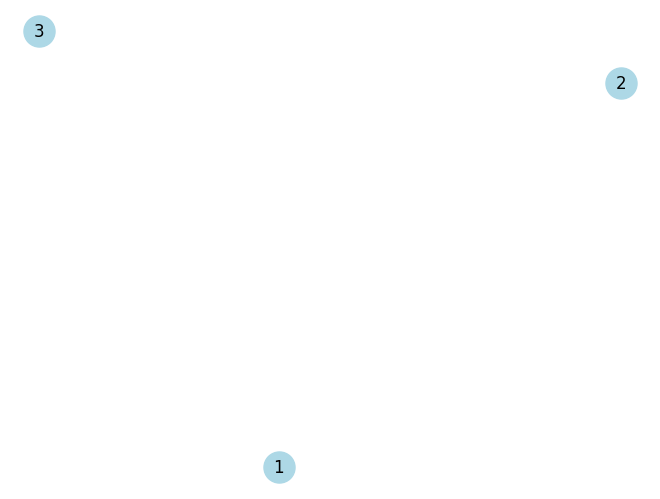

Graph nodes: [1, 2, 3]
Graph edges: []


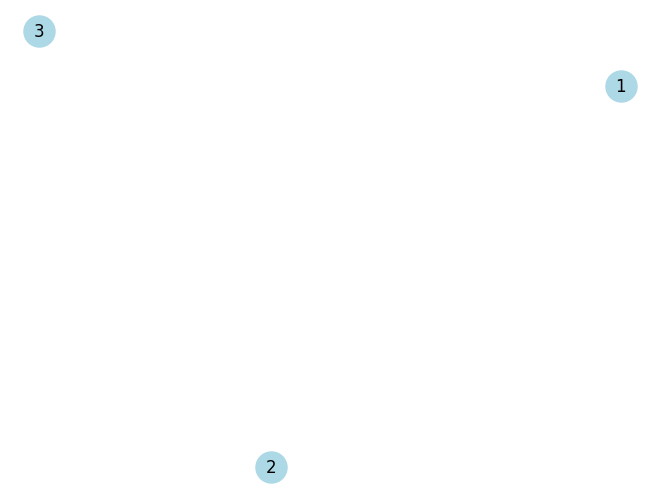

Graph nodes: [1, 2, 3, 5]
Graph edges: []


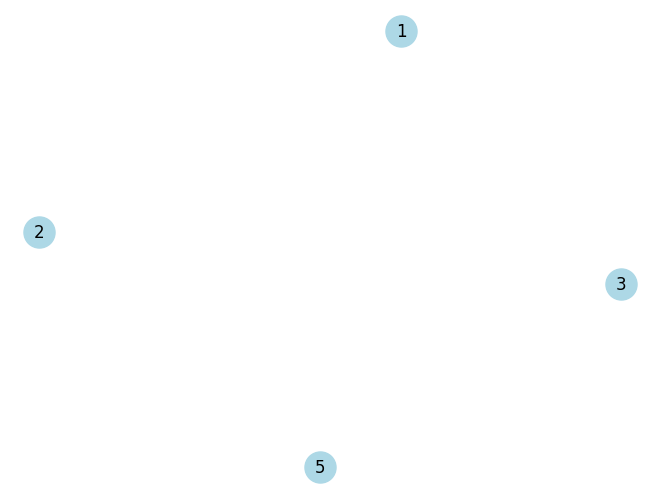

Graph nodes: [1, 2]
Graph edges: []


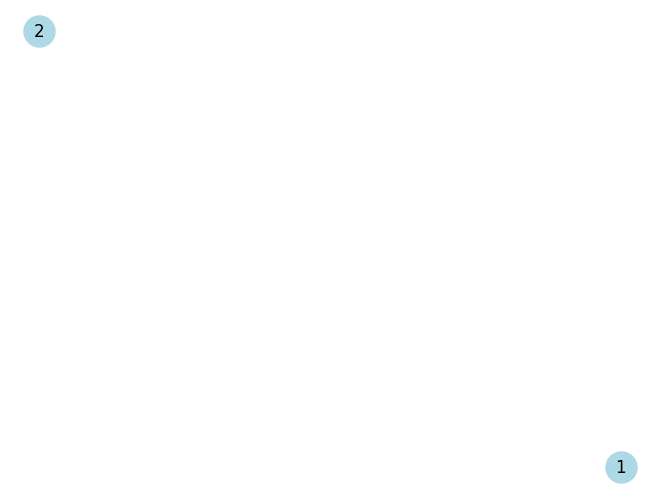

In [10]:
#populate spatial graph with nodes

frames= []
for frame in input_frames:
  G = nx.DiGraph()
  for i in frame:
    temp=i.strip("\n").split(",")
    #xy=(center_point(float(temp[1]), float(temp[2]), float(temp[3]), float(temp[4])))
    xy=(float(temp[5]), float(temp[6]))
    G.add_node(int(float(temp[7])), xy=xy)

  frames.append(G)

for i in frames:
  print_graph(i)


In [11]:

g=frames[0]
A=to_agraph(g)
A.layout('dot')

#A.node_attr["style"] = "filled"
A.edge_attr["len"] = "2"
A.node_attr["fontsize"] = "22"
A.edge_attr["fontsize"] = "18"

#A.write("graph.dot") # write to simple.dot
#A.read("graph.dot") # write to simple.dot
A.draw("Interaction_Graph.png", prog="neato")


Graph nodes: [1, 2, 3]
Graph edges: [(1, 2, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (1, 3, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (2, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (2, 3, {'label': 2, 'label_str': 'Bottom-Right', 'color': 'lightgreen'}), (3, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (3, 2, {'label': 3, 'label_str': 'Top-Left', 'color': 'orange'})]


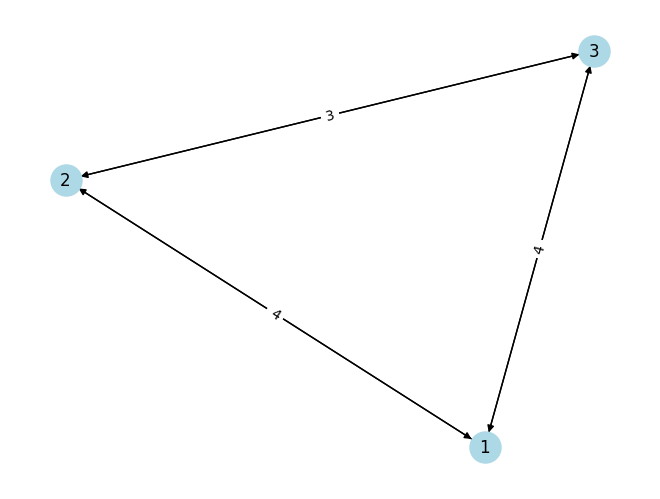

Graph nodes: [1, 2, 3]
Graph edges: [(1, 2, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (1, 3, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (2, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (2, 3, {'label': 2, 'label_str': 'Bottom-Right', 'color': 'lightgreen'}), (3, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (3, 2, {'label': 3, 'label_str': 'Top-Left', 'color': 'orange'})]


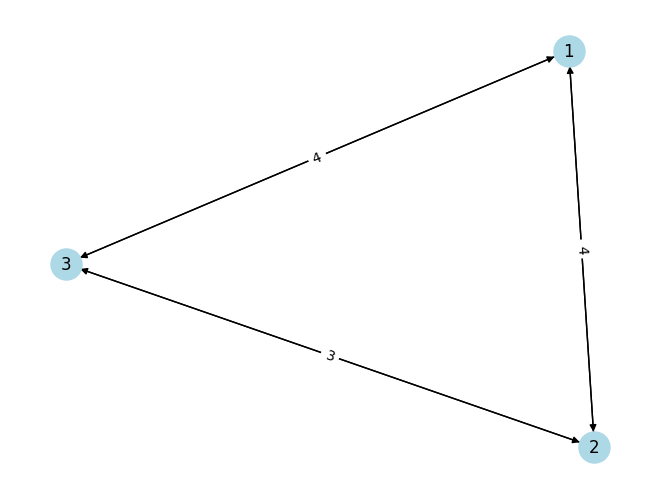

Graph nodes: [1, 2, 3, 5]
Graph edges: [(1, 2, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (1, 3, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (1, 5, {'label': 2, 'label_str': 'Bottom-Right', 'color': 'lightgreen'}), (2, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (2, 3, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (2, 5, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (3, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (3, 2, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (3, 5, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'}), (5, 1, {'label': 3, 'label_str': 'Top-Left', 'color': 'orange'}), (5, 2, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (5, 3, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'})]


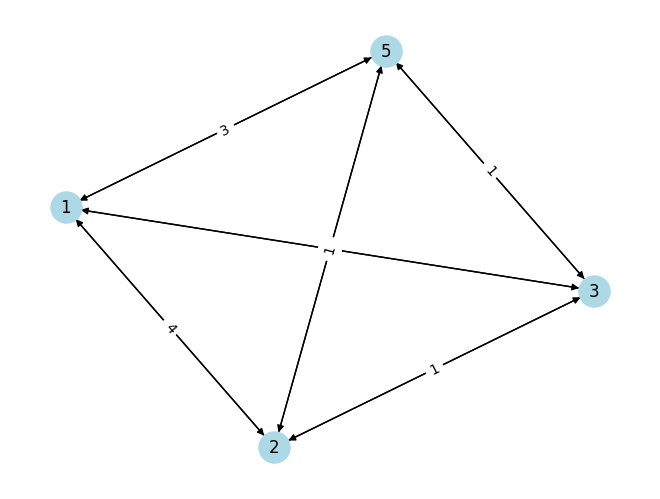

Graph nodes: [1, 2]
Graph edges: [(1, 2, {'label': 1, 'label_str': 'Bottom-Left', 'color': 'lightblue'}), (2, 1, {'label': 4, 'label_str': 'Top-Right', 'color': 'pink'})]


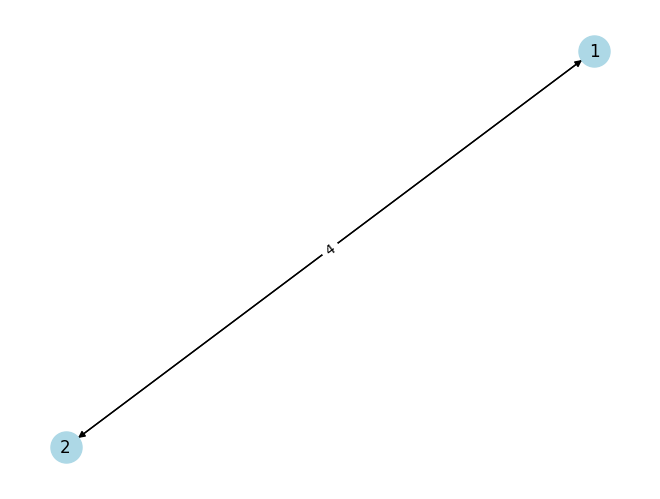

In [12]:
#populate spatial graph with edges
spatial_graph_attr={

}
for G in frames:
  for obj1 in G.nodes():
    for obj2 in G.nodes():
      if obj1 != obj2:
        obj1_x , obj1_y = G.nodes[obj1]["xy"][0] , G.nodes[obj1]["xy"][1]
        obj2_x , obj2_y = G.nodes[obj2]["xy"][0] , G.nodes[obj2]["xy"][1]

        if obj1_x >= obj2_x and obj1_y >= obj2_y:
          label =2 # bottom-right
          label_str = "Bottom-Right" # bottom-right
          edge_color = "lightgreen"
        elif obj1_x < obj2_x and obj1_y >= obj2_y:
          label =1
          label_str = "Bottom-Left" # bottom-right
          edge_color = "lightblue"
        elif obj1_x < obj2_x and obj1_y < obj2_y:
          label =3
          label_str = "Top-Left" # bottom-right
          edge_color = "orange"
        elif obj1_x >= obj2_x and obj1_y < obj2_y:
          label =4
          label_str = "Top-Right" # bottom-right
          edge_color= "pink"

        G.add_edge(obj1, obj2, label=label, label_str=label_str, color=edge_color)

for n,i in enumerate(frames):
  print_graph(i)
  save_graph(i,"spatial_graph_"+str(n))


In [13]:
# 0 Moving left to right
# 1 Moving right to left
# 2 Moving forward
# 3 Moving backward
# 4 No change
# 5 Self edge
# 6 Moving foward * (not included)
# 7 Moving backward * (not included)

rel_attr={
    (0, 0): [5, "Self edge", "black"],
    (1, 1): [4, "No change", "darkgray"],
    (1, 2): [0, "Moving left to right", "green"],
    (1, 3): [2, "Moving forward", "blue"],
    (1, 4): [6, "Moving forward * (not included)", "black"],
    (2, 1): [1, "Moving right to left", "orange"],
    (2, 2): [4, "No change", "darkgray"],
    (2, 3): [6, "Moving foward * (not included)", "black"],
    (2, 4): [2, "Moving forward", "blue"],
    (3, 1): [3, "Moving backward", "red"],
    (3, 2): [7, "Moving backward * (not included)", "black"],
    (3, 3): [4, "No change", "darkgray"],
    (3, 4): [0, "Moving left to right", "green"],
    (4, 1): [7, "Moving backward * (not included)", "black"],
    (4, 2): [3, "Moving backward", "red"],
    (4, 3): [1, "Moving right to left", "orange"],
    (4, 4): [4, "No change", "darkgray"]
}
def comp(prev, curr):
  if(prev == 0 and curr == 0):
    return 5  # 5 self edge
  elif(prev == 1 and curr == 2):
    return 0
  elif(prev == 1 and curr == 3):
    return 2
  elif(prev == 1 and curr == 4):
    return 6 # 6 moving foward * (not included)
  elif(prev == 2 and curr == 1):
    return 1
  elif(prev == 2 and curr == 3):
    return 6 # 6 moving foward * (not included)
  elif(prev == 2 and curr == 4):
    return 2
  elif(prev == 3 and curr == 1):
    return 3
  elif(prev == 3 and curr == 2):
    return 7 # 7 moving backward * (not included)
  elif(prev == 3 and curr == 4):
    return 0
  elif(prev == 4 and curr == 1):
    return 7 # 7 moving backward * (not included)
  elif(prev == 4 and curr == 2):
    return 3
  elif(prev == 4 and curr == 3):
    return 1
  elif(prev == curr):
    return 4
  else:
    raise TypeError("Fucntion Comp Failed!!")

In [14]:
#pop IG with nodes from all frames
Iframes=[]
#IG = nx.MultiDiGraph()
IG = nx.DiGraph()
for G in frames:
  for node in G.nodes():
    if not node in IG.nodes():IG.add_node(node)
print(IG.number_of_nodes())

4


In [15]:
#create a list with all edges in all frames
edge_list=[]
for G in frames:
  for edge in G.edges():
    if not edge in edge_list:
      edge_list.append(edge)
print(edge_list)

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (1, 5), (2, 5), (3, 5), (5, 1), (5, 2), (5, 3)]


Graph nodes: [1, 2, 3, 5]
Graph edges: [(1, 2, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (1, 3, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 3, {'label': 2, 'label_str': 'Moving forward', 'color': 'blue'}), (3, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (3, 2, {'label': 3, 'label_str': 'Moving backward', 'color': 'red'})]


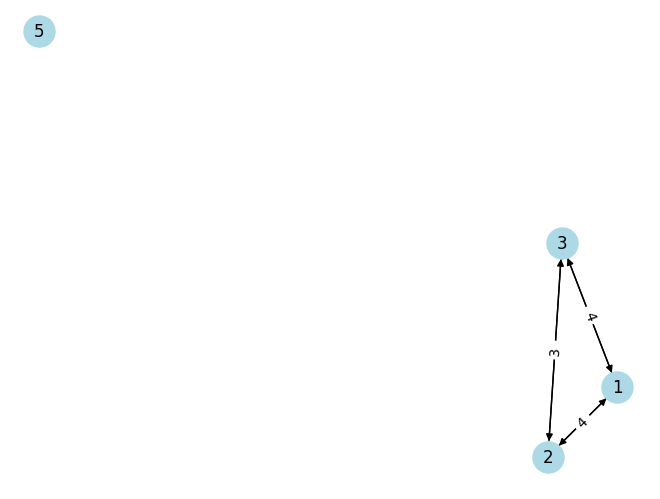

In [16]:
#from tempfile import tempdir
#Create interaction graph
for edge in edge_list:
  label=None
  for n, G in enumerate(frames):
    if n+1==len(frames):break
    if not edge in G.edges() or not edge in frames[n+1].edges(): continue

    obj1, obj2 = G.edges()[(edge)], frames[n+1].edges()[(edge)]
    #label=comp(obj1["label"], obj2["label"])
    a, temp, _=rel_attr[obj1["label"], obj2["label"]]
    if temp == "No change" and label!=None: continue

    label, label_str, edge_color=rel_attr[obj1["label"], obj2["label"]]
    #IG.add_edge(*edge, label=label) #priorites the last interaction #could put bool counter here to only add edge once if it found any but it looks uglier
  if (label!=None):
    IG.add_edge(*edge, label=label, label_str=label_str, color=edge_color)

print_graph(IG)


In [17]:
#[[u,v ,w] for u, v, w in IG.edges(data="label")]

In [18]:
RELATION_COLORS = ["red", "yellow", "blue", "green", "purple", "black"]

G=IG

print("Graph nodes:", G.nodes())
print("Graph edges:", G.edges())

A = to_agraph(G)

A.layout('dot')
#A.node_attr["style"] = "filled"
A.edge_attr["len"] = "2"
A.node_attr["fontsize"] = "22"
A.edge_attr["fontsize"] = "18"

#A.write("graph.dot") # write to simple.dot
#A.read("graph.dot") # write to simple.dot
A.graph_attr["label"] = "Interaction Graph"
A.draw("Interaction_Graph.png", prog="neato")


Graph nodes: [1, 2, 3, 5]
Graph edges: [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]


In [19]:
#save_graph(IG,"Interaction Graph")

Graph nodes: [1, 2, 3, 5]
Graph edges: [(1, 2, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (1, 3, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 3, {'label': 2, 'label_str': 'Moving forward', 'color': 'blue'}), (3, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (3, 2, {'label': 3, 'label_str': 'Moving backward', 'color': 'red'})]


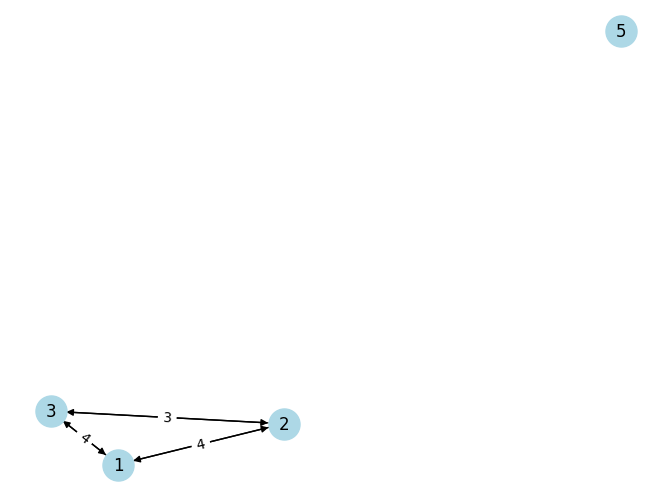

3
Graph nodes: [1, 2, 3, 5]
Graph edges: [(1, 2, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (1, 3, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 3, {'label': 2, 'label_str': 'Moving forward', 'color': 'blue'}), (3, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (3, 2, {'label': 3, 'label_str': 'Moving backward', 'color': 'red'})]


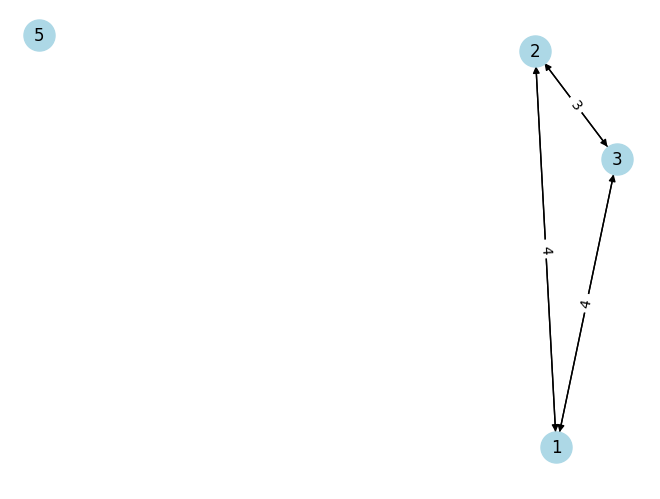

In [20]:
#save graphs with pickle
import pickle

# save graph object to file
a=[IG,IG,IG]
pickle.dump(a, open('filename.pickle', 'wb'))
print_graph(a[1])

# load graph object from file
b = pickle.load(open('filename.pickle', 'rb'))
print(len(b))
print_graph(b[1])

In [21]:
!pip install torch_geometric
import torch_geometric
from torch_geometric.utils import from_networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s eta 0:00:00


In [23]:
print(G.edges)
IG.edges[(1,2)]
#IG["y"]=IG["label"]


[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]


{'label': 4, 'label_str': 'No change', 'color': 'darkgray'}

In [24]:
nx.write_multiline_adjlist(IG,"test.adjlist")

In [34]:

nx.write_edgelist(IG,"test.csv",data=True )
B=nx.read_edgelist("test.csv",data=True ,edgetype=int, nodetype=int, create_using=nx.DiGraph)
B.edges(data=True)
IG.edges(data=True)


OutEdgeDataView([(1, 2, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (1, 3, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (2, 3, {'label': 2, 'label_str': 'Moving forward', 'color': 'blue'}), (3, 1, {'label': 4, 'label_str': 'No change', 'color': 'darkgray'}), (3, 2, {'label': 3, 'label_str': 'Moving backward', 'color': 'red'})])

In [26]:
data=from_networkx(B)


AttributeError: ignored

In [27]:
i=1
#IG[data.edge_index[0][i].item()][2]
print(IG[data.edge_index[0][i].item()+1][data.edge_index[1][i].item()+1])

{'label': 4, 'label_str': 'No change', 'color': 'darkgray'}


In [28]:
data=from_networkx(IG)
print(data.edge_index)
edge_attr=[]
for i in range(len(data.edge_index[0])):
  print([data.edge_index[0][i]+1][0].item())
  t=(IG[data.edge_index[0][i].item()][data.edge_index[1][i].item()])
  print(t)
  edge_attr.append=t
edge_attr
#edge_attr= [IG[] for i in data.edge_index]
#print(edge_attr)


'''
edge_attr[i] corresponds to the edge
between edge_index[0][i] and edge_index[1][i].
'''


tensor([[0, 0, 1, 1, 2, 2],
        [1, 2, 0, 2, 0, 1]])
1


KeyError: ignored

In [ ]:
edge_index=[for i in IG.edges()]